## Terminal

In [1]:
# pip install --upgrade attrs (When get attrs error)
# pip install --upgrade scrapy
import scrapy
import os
import sys

In [2]:
!scrapy

Scrapy 2.2.0 - no active project

Usage:
  scrapy <command> [options] [args]

Available commands:
  bench         Run quick benchmark test
  commands      
  fetch         Fetch a URL using the Scrapy downloader
  genspider     Generate new spider using pre-defined templates
  runspider     Run a self-contained spider (without creating a project)
  settings      Get settings values
  shell         Interactive scraping console
  startproject  Create new project
  version       Print Scrapy version
  view          Open URL in browser, as seen by Scrapy

  [ more ]      More commands available when run from project directory

Use "scrapy <command> -h" to see more info about a command


In [3]:
# To create a project, Folder with name 'quotes_spider' made wherever you set the directory
!scrapy startproject quotes_spider

New Scrapy project 'quotes_spider', using template directory 'c:\programdata\anaconda3\lib\site-packages\scrapy\templates\project', created in:
    C:\Users\Acer\Desktop\Codes\Web Scraping and Web Crawling Codes And Info\quotes_spider

You can start your first spider with:
    cd quotes_spider
    scrapy genspider example example.com


In [4]:
# os.chdir('../') # To go back a folder
path = os.getcwd()
print(path)
os.listdir()

C:\Users\Acer\Desktop\Codes\Web Scraping and Web Crawling Codes And Info


['.ipynb_checkpoints',
 'quotes_spider',
 'Web Scraping and Web Crawling.docx',
 'Web Scraping.ipynb',
 '~$b Scraping and Web Crawling.docx']

In [5]:
os.chdir('./quotes_spider') # To go in a file
os.listdir()

['quotes_spider', 'scrapy.cfg']

In [6]:
!scrapy
# Look how the project name changed

Scrapy 2.2.0 - project: quotes_spider

Usage:
  scrapy <command> [options] [args]

Available commands:
  bench         Run quick benchmark test
  check         Check spider contracts
  commands      
  crawl         Run a spider
  edit          Edit spider
  fetch         Fetch a URL using the Scrapy downloader
  genspider     Generate new spider using pre-defined templates
  list          List available spiders
  parse         Parse URL (using its spider) and print the results
  runspider     Run a self-contained spider (without creating a project)
  settings      Get settings values
  shell         Interactive scraping console
  startproject  Create new project
  version       Print Scrapy version
  view          Open URL in browser, as seen by Scrapy

Use "scrapy <command> -h" to see more info about a command


In [7]:
# quotes_ is the name of the spider you are generating
# Remove the http and the /
# # http://quotes.toscrape.com/
# Creates a folder in spider with the name quotes_.py
!scrapy genspider quotes_ quotes.toscrape.com

Created spider 'quotes_' using template 'basic' in module:
  quotes_spider.spiders.quotes_


In [8]:
# If generate more spiders they will appear in the folder and over here
# !scrapy genspider exampleSpider example.com # To make a generate a new spider
!scrapy list

quotes_


In [9]:
os.chdir('../')
os.listdir()

['.ipynb_checkpoints',
 'quotes_spider',
 'Web Scraping and Web Crawling.docx',
 'Web Scraping.ipynb',
 '~$b Scraping and Web Crawling.docx']

# Start From Here
scrapy startproject quotes_spider  
scrapy genspider quotes_ quotes.toscrape.com  
#### All Terminal Code

In [ ]:
# scrapy
# scrapy version
# scrapy startproject quotes_spider (Creates a folder for the crawler)
# cd quotes_spider
# scrapy genspider quotes_ quotes.toscrape.com (Go into quotes_spider >> spiders >> quotes_.py)
# scrapy list (To check all the spiders present)

### Scrapy Shell
* After creating the files we now need to run the Shell commands below
* These show generally how to get elements from the web
* After we know these scripts work we will take them to our spider we created i.e quotes_.py in the parse function
* We save the .py file and then run but befoere running go to settings.py and change ROBOTSTXT_OBEY = True to False  
(Desktop/quotes_spider$ scrapy crawl quotes_)
* The path to where to run this can also be found out by typing scrapy and where you get the active project

http://quotes.toscrape.com/

In [ ]:
Get Title

# scrapy shell
# fetch("http://quotes.toscrape.com/")
# response
// Inspect the element you wish to scrape
# response.xpath('//h1/a/text()')
// Go into the h1 tags and then goes into the a tag if available and then goes to the text
# response.xpath('//h1/a/text()').extract()
// If want string and not list [u'Quotes To Scrape'] add extract_first
# response.xpath('//h1/a/text()').extract_first()

In [ ]:
Get Tags on right side of page, they have class tag-item

# response.xpath('//*[@class="tag-item"]')
// To see if the length is the one we want then we do 
# len(response.xpath('//*[@class="tag-item"]'))
// Cant do extract first here
# response.xpath('//*[@class="tag-item"]/a/text()').extract()

To run python file  
$ scrapy crawl quotes_

In [ ]:
# quotes_.py
import scrapy


class QuotesSpider(scrapy.Spider):
    name = 'quotes_'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        h1_tag = response.xpath('//h1/a/text()').extract_first()
        tags_var = response.xpath('//*[@class="tag-item"]/a/text()').extract()

        yield {
                'H1 Tag': h1_tag,
                'Tags': tags_var
                }


### Xpath Features

In [ ]:
--- In Scrapy Shell
#  from scrapy.selector import Selector
Copy this
html_docx = '''
<html>
  <head>
    <title>Title of the page</title>
  </head>
  <body>
    <h1>H1 Tag</h1>
    <h2>H2 Tag with <a href="#">link</a></h2>
    <p>First Paragraph</p>
    <p>Second Paragraph</p>
  </body>
</html>
'''

Then in the shell
# % paste
# sel = Selector(text=html_docx)
# sel.extract()
# sel.xpath('/html/head/title')
# sel.xpath('/html/head/title').extract()

Now Selecting all of the HTML titles
# sel.xpath('//title').extract()

Selecting Paragraphs from a certain loaction
# sel.xpath('/html/body/p').extract()

Selecting a particular paragraph (The 2nd one)
# sel.xpath('/html/body/p[2]').extract()
Which is equal to python index 1
# sel.xpath('/html/body/p')[1].extract()

For the text just add /text() infront of p

To select href from a
#sel.xpath('//h2/a/@href').extract()

For css selector
# sel.css('h2')

### Advanced Spider
Lets go back to our quotes_.py  
We will scrape quotes.toscrape.com and for each will scrape the texts for each quote, the author and the tags. There are approx 10 on each page and there are approx 10 pages

In [ ]:
On Terminal
Scrapy shell
# fetch('http://quotes.toscrape.com/')
# quotes = response.xpath('//*[@class="quote"]')

# for quote in quotes:
Use dot before // to only get data from the chosen div
#     text = quote.xpath('.//*[@class="text"]/text()').extract_first() 
#     author = quote.xpath('.//*[@itemprop="author"]/text()').extract_first()
#     tags = quote.xpath('.//*[@itemprop="keywords"]/@content').extract_first()
# #     or tags = quote.xpath('.//*[@class="tag"]/text()').extract()

Go to next page using url
Get url from this line
# next_page_url = response.xpath('//*[@class="next"]/a/@href').extract_first() 
Add to existing url 
# absolute_next_page_url = response.urljoin(next_page_url) 

Run with command  
$ scrapy crawl quotes_ -o quotes.csv  
And it will save this in a csv and can also do quotes.json or quotes.xml

In [ ]:
# quotes.py_
import scrapy


class QuotesSpider(scrapy.Spider):
    name = 'quotes_'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):

        quotes = response.xpath('//*[@class="quote"]')
        for quote in quotes:
            text = quote.xpath('.//*[@class="text"]/text()').extract_first() # Use dot before // to only get data from the chosen div
            author = quote.xpath('.//*[@itemprop="author"]/text()').extract_first()
            tags = quote.xpath('.//*[@itemprop="keywords"]/@content').extract_first()
    
            yield {
                'Text': text,
                'Author': author,
                'Tags': tags
            } 

        next_page_url = response.xpath('//*[@class="next"]/a/@href').extract_first()
        absolute_next_page_url = response.urljoin(next_page_url)
        yield scrapy.Request(absolute_next_page_url)


In [ ]:
# Items.py (This is the unchanged version of items.py)
import scrapy


class QuotesSpiderItem(scrapy.Item):
    # define the fields for your item here like:
    # name = scrapy.Field()
    pass

#### Scrapy Architecture
Doing some changes within Items.py Settings.py and Pipelines.py  
Check again to see if need to do something extra


Settings.py ROBOTSTXT_OBEY = True to False  
Items.py (Shown in code below)

In [2]:
import os
os.listdir('./quotes_spider')

['quotes_spider', 'scrapy.cfg']

In [3]:
os.listdir('./quotes_spider/quotes_spider')

['items.py',
 'middlewares.py',
 'pipelines.py',
 'settings.py',
 'spiders',
 '__init__.py',
 '__pycache__']

 From this architecture we are choosing how we want the values to appear in the CSV, otherwise we dont have the option as to what goes in what order of columns

In [ ]:
# quotes_.py
from scrapy import Spider # Newly added
from scrapy .loader import ItemLoader # Newly added
from quotes_spider.items import QuotesSpiderItem

class QuotesSpider(scrapy.Spider):
    name = 'quotes_'
    allowed_domains = ['quotes.toscrape.com']
    start_urls = ['http://quotes.toscrape.com/']

    def parse(self, response):
        loader = ItemLoader(item=QuotesSpiderItem, response=response)
        h1_tag = response.xpath('//h1/a/text()').extract_first()
        tags_var = response.xpath('//*[@class="tag-item"]/a/text()').extract()
        
        loader.add_value('h1_tag',h1_tag)
        loader.add_value('tags_var',tags_var)
        
        return loader.load_item()

In [ ]:
# items.py
import scrapy


class QuotesSpiderItem(scrapy.Item):
    # define the fields for your item here like:
    h1_tag = scrapy.Field()
    tags_var = scrapy.Field()


## Deploy Spider To The ScrapingHub
https://www.scrapinghub.com/  

Watch the video and sign up and deploy your spider here. This is a safer tool than the server as it checks if you are allowed to scrape the website and it also runs on its own server

### Logging into a Website using Scrapy

In [ ]:
Go to http://quotes.toscrape.com/login  
Command Line  
Web Scraping and Web Crawling Codes And Info\quotes_spider>scrapy shell  
$ fetch('http://quotes.toscrape.com/login')  
$ response.xpath('//*[@name="csrf_token"]')  
-> [<Selector xpath='//*[@name="csrf_token"]' data='<input type="hidden" name="csrf_token...'>]  
$ response.xpath('//*[@name="csrf_token"]').extract()  
-> ['<input type="hidden" name="csrf_token" value="ofPhrWieFMCEcTbgxOkQaAByRqGmsdjYvKptIVSXDzulwJUZNnHL">']  
$ response.xpath('//*[@name="csrf_token"]/@value').extract_first()  
-> ['ofPhrWieFMCEcTbgxOkQaAByRqGmsdjYvKptIVSXDzulwJUZNnHL']  

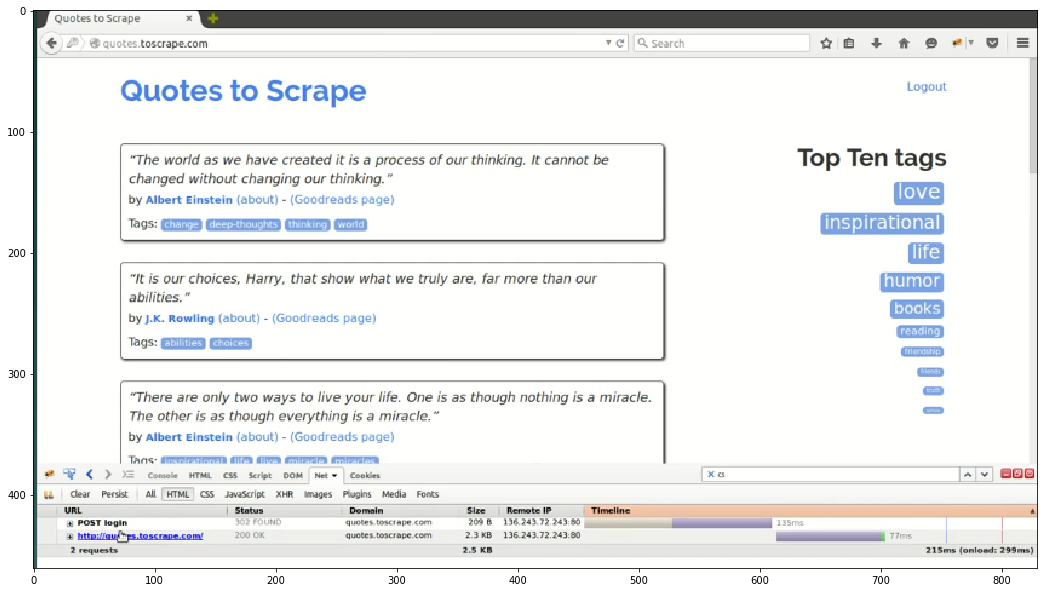

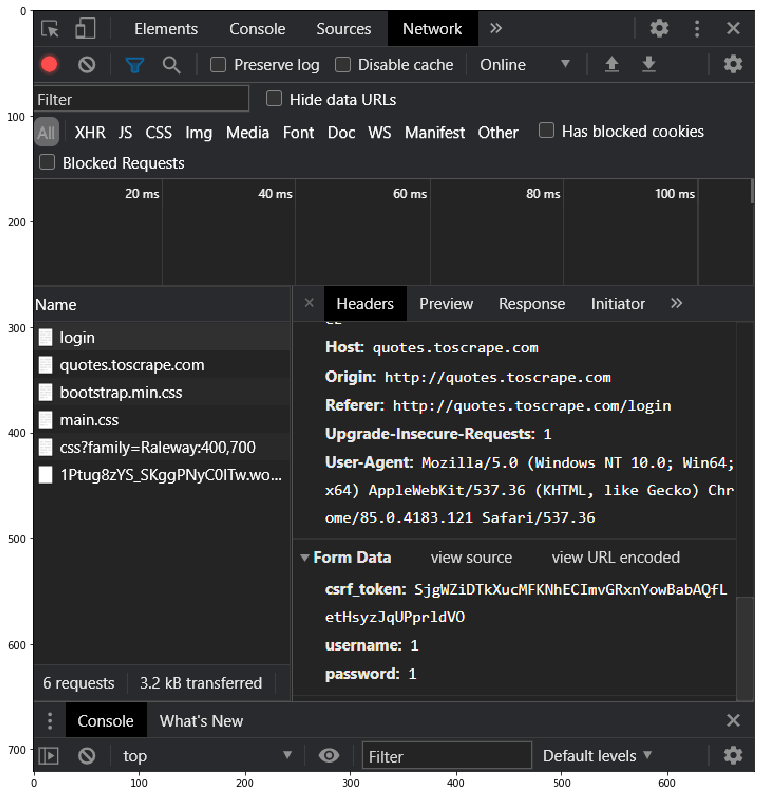

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def showImage(x):    
    plt.figure(figsize=(18,14))
    img = mpimg.imread('' + str(x) + '.PNG')
    plt.imshow(img)
showImage(1)
showImage(2)

After Logging In To the Website  
Go to inspect element having it opened from before  
Check Network  
Press the one for log in  
In headers scroll down to the form data which has the csrf token, username, password  

In [ ]:
# quotes_.py
from scrapy import Spider 
from scrapy .loader import ItemLoader
from scrapy.http import FormRequest # Newly added
from scrapy.utils.response import open_in_browser

from quotes_spider.items import QuotesSpiderItem

class QuotesSpider(scrapy.Spider):
    name = 'quotes_'
    start_urls = ('http://quotes.toscrape.com/login')
    
    def parse(self, response): # Newly Added
        token = response.xpath('//*[@name="csrf_token"]/@value').extract_first()
        return FormRequest.from_response(response,
                                         formdata = {'csrf_token': token,
                                                     'username': 'Blah' ,
                                                     'password': 'Blah'},
                                        callback = self.scrape_home_page)
        
    
    def scrape_home_page(self, response): # Same Function different name
        open_in_browser(response) # Newly Added
        loader = ItemLoader(item=QuotesSpiderItem, response=response)
        h1_tag = response.xpath('//h1/a/text()').extract_first()
        tags_var = response.xpath('//*[@class="tag-item"]/a/text()').extract()
        
        loader.add_value('h1_tag',h1_tag)
        loader.add_value('tags_var',tags_var)
        
        return loader.load_item()

In [ ]:
# items.py
import scrapy


class QuotesSpiderItem(scrapy.Item):
    # define the fields for your item here like:
    h1_tag = scrapy.Field()
    tags_var = scrapy.Field()
